In [1]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 박스 플롯 hue 구현 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
tips = sns.load_dataset('tips')

# 데이터 준비
days = tips['day'].unique()
smokers = tips['smoker'].unique()

plt.figure(figsize=(8, 5))

# 각 day와 smoker 그룹별로 박스플롯 그리기
positions = []
data_to_plot = []
pos = 1

for day in sorted(days):  # day 순서대로
    for smoker in sorted(smokers):  # smoker = No, Yes
        group = tips[(tips['day'] == day) & (tips['smoker'] == smoker)]['total_bill']
        data_to_plot.append(group)
        positions.append(pos)
        pos += 1
    pos += 1  # day 사이 간격

# 박스플롯 그리기
bp = plt.boxplot(data_to_plot, positions=positions, widths=0.6, patch_artist=True)

# 색상 채우기 (smoker 구분)
colors = ['lightblue', 'lightcoral'] * len(days)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# x축 레이블: day 가운데 배치
xticks = []
xlabels = []
for i, day in enumerate(sorted(days)):
    xticks.append((i* (len(smokers)+1)) + 1.5)  # day 그룹의 중앙
    xlabels.append(day)

plt.xticks(xticks, xlabels)
plt.xlabel("day")
plt.ylabel("total_bill")
plt.title('Total Bill Distribution by Day and Smoker')

# 범례 추가
from matplotlib.patches import Patch
legend_handles = [Patch(color='lightblue', label='No'),
                  Patch(color='lightcoral', label='Yes')]
plt.legend(handles=legend_handles, title="smoker")

plt.show()

C:\Users\kangs\miniconda3\envs\ADP-study\lib\site-packages\matplotlib\cbook\__init__.py:1395: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 800x500 with 1 Axes>

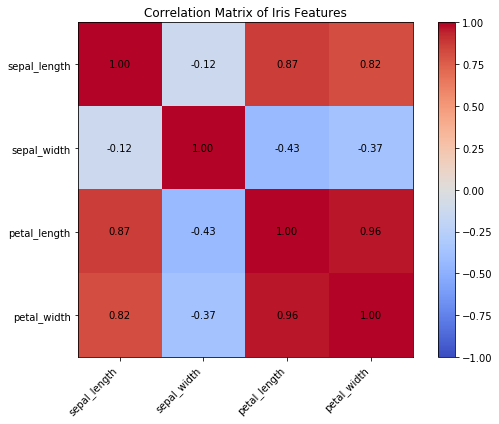

In [2]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 heatmap 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
iris = sns.load_dataset('iris')

# 수치형 변수 간 상관계수 계산
corr = iris.corr()

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(8, 6))

# imshow로 색상 맵 시각화
cax = ax.imshow(corr.values, cmap='coolwarm', vmin=-1, vmax=1)

# 컬럼 이름으로 x, y축 라벨 설정
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

# 각 셀에 상관계수 값 표시
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", ha='center', va='center', color='black')

# 컬러바 추가
fig.colorbar(cax)

plt.title('Correlation Matrix of Iris Features')
plt.tight_layout()
plt.show()


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install lifelines==0.25.11

   --------------------------------------- 348.0/348.0 kB 22.5 MB/s eta 0:00:00
   ---------------------------------------- 56.0/56.0 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: formulaic
    Found existing installation: formulaic 0.3.4
    Uninstalling formulaic-0.3.4:
      Successfully uninstalled formulaic-0.3.4
  Attempting uninstall: lifelines
    Found existing installation: lifelines 0.27.4
    Uninstalling lifelines-0.27.4:
      Successfully uninstalled lifelines-0.27.4


In [6]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
import matplotlib.pyplot as plt

# 1. 데이터 준비
# 예시 데이터: 환자 ID, 관찰 시간(duration), 사건 발생 여부(event, 1=사건 발생, 0=중도 절단)
# 그룹 정보(group) 추가
data = {
    'id': range(1, 21),
    'duration': [10, 12, 15, 20, 22, 25, 28, 30, 35, 40, 
                 11, 13, 16, 21, 23, 26, 29, 31, 36, 41],
    'event': [1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 
              1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
    'group': ['A']*10 + ['B']*10
}
df = pd.DataFrame(data)

# 2. Kaplan-Meier Fitter 객체 생성 및 학습
kmf = KaplanMeierFitter()

# 전체 데이터에 대한 생존 곡선
kmf.fit(df['duration'], event_observed=df['event'])

plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Function (Overall)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

# 그룹별 생존 곡선
plt.figure(figsize=(10, 6))
for name, grouped_df in df.groupby('group'):
    kmf.fit(grouped_df['duration'], event_observed=grouped_df['event'], label=name)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Function by Group')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.legend()
add_at_risk_counts(kmf, ax=plt.gca()) # 각 시점별 위험군 수 표시
plt.show()

# 3. 중앙 생존 시간 (Median Survival Time) 확인
print("--- 중앙 생존 시간 ---")
print(f"전체 데이터 중앙 생존 시간: {kmf.median_survival_time_}")

for name, grouped_df in df.groupby('group'):
    kmf.fit(grouped_df['duration'], event_observed=grouped_df['event'])
    print(f"그룹 {name} 중앙 생존 시간: {kmf.median_survival_time_}")

TypeError: import_optional_dependency() got an unexpected keyword argument 'errors'

C:\Users\kangs\miniconda3\envs\ADP-study\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\kangs\miniconda3\envs\ADP-study\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\kangs\miniconda3\envs\ADP-study\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


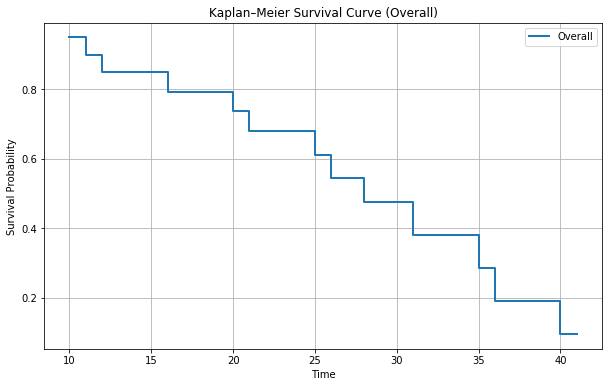

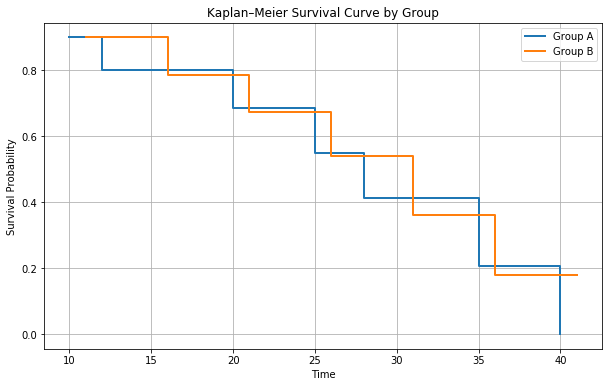

--- 중앙 생존 시간 ---


TypeError: import_optional_dependency() got an unexpected keyword argument 'errors'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. 데이터 준비
# -----------------------------
data = {
    'id': range(1, 21),
    'duration': [10, 12, 15, 20, 22, 25, 28, 30, 35, 40,
                 11, 13, 16, 21, 23, 26, 29, 31, 36, 41],
    'event': [1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
              1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
    'group': ['A'] * 10 + ['B'] * 10
}
df = pd.DataFrame(data)

# -----------------------------
# 2. Kaplan-Meier 함수 정의
# -----------------------------
def kaplan_meier_estimator(durations, events):
    """
    durations: 생존 시간 (numpy array)
    events: 사건 발생 여부 (1=발생, 0=중도 절단)
    return: times, survival_prob
    """
    # 시간 순으로 정렬
    order = np.argsort(durations)
    durations = np.array(durations)[order]
    events = np.array(events)[order]

    # 유일한 시간 구하기
    unique_times = np.unique(durations)
    n_at_risk = []
    n_events = []
    survival_probs = []

    n = len(durations)
    surv_prob = 1.0

    for t in unique_times:
        # 현재 시점 t에서 위험군 수
        at_risk = np.sum(durations >= t)
        # 사건 발생 수
        d = np.sum((durations == t) & (events == 1))

        if at_risk > 0:
            surv_prob *= (1 - d / at_risk)
        survival_probs.append(surv_prob)
        n_at_risk.append(at_risk)
        n_events.append(d)

    return pd.DataFrame({
        'time': unique_times,
        'n_risk': n_at_risk,
        'n_event': n_events,
        'survival': survival_probs
    })

# -----------------------------
# 3. 전체 생존 곡선 계산
# -----------------------------
overall_km = kaplan_meier_estimator(df['duration'], df['event'])

plt.figure(figsize=(10, 6))
plt.step(overall_km['time'], overall_km['survival'], where='post', label='Overall', linewidth=2)
plt.title('Kaplan–Meier Survival Curve (Overall)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# 4. 그룹별 생존 곡선
# -----------------------------
plt.figure(figsize=(10, 6))
for name, grouped_df in df.groupby('group'):
    km = kaplan_meier_estimator(grouped_df['duration'], grouped_df['event'])
    plt.step(km['time'], km['survival'], where='post', label=f'Group {name}', linewidth=2)

plt.title('Kaplan–Meier Survival Curve by Group')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# 5. 중앙 생존시간 계산
# -----------------------------
def median_survival_time(km_df):
    """생존확률이 0.5 이하가 되는 최초 시점"""
    below_half = km_df[km_df['survival'] <= 0.5]
    if len(below_half) == 0:
        return np.nan
    return below_half.iloc[0]['time']

print("--- 중앙 생존 시간 ---")
print(f"전체: {median_survival_time(overall_km):.2f}")

for name, grouped_df in df.groupby('group'):
    km = kaplan_meier_estimator(grouped_df['duration'], grouped_df['event'])
    print(f"그룹 {name}: {median_survival_time(km):.2f}")


C:\Users\kangs\miniconda3\envs\ADP-study\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\kangs\miniconda3\envs\ADP-study\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\kangs\miniconda3\envs\ADP-study\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


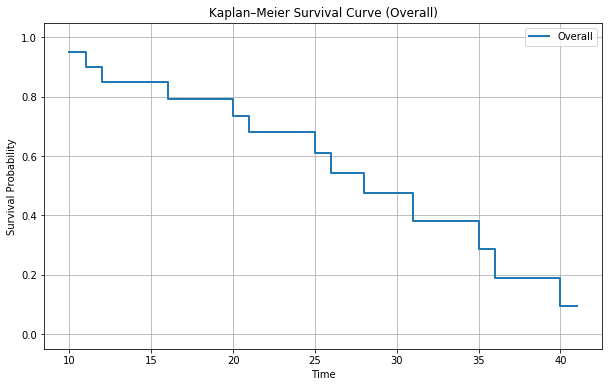

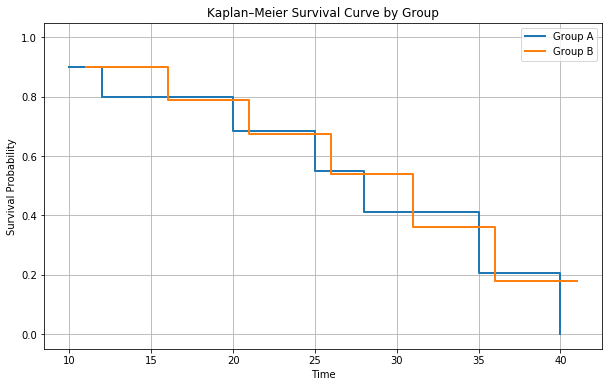

--- 중앙 생존 시간 ---
전체: 28.00
그룹 A: 28.00
그룹 B: 31.00


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. 데이터 준비
# -----------------------------
data = {
    'id': range(1, 21),
    'duration': [10, 12, 15, 20, 22, 25, 28, 30, 35, 40,
                 11, 13, 16, 21, 23, 26, 29, 31, 36, 41],
    'event': [1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
              1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
    'group': ['A'] * 10 + ['B'] * 10
}
df = pd.DataFrame(data)

# -----------------------------
# 2. Kaplan-Meier 함수 정의
# -----------------------------
def kaplan_meier_estimator(durations, events):
    """
    durations: iterable of times
    events: iterable of event indicators (1=event, 0=censor)
    return: pd.DataFrame with columns ['time','n_risk','n_event','survival']
    """
    durations = np.asarray(durations)
    events = np.asarray(events).astype(int)

    order = np.argsort(durations)
    durations = durations[order]
    events = events[order]

    unique_times = np.unique(durations)
    n_at_risk = []
    n_events = []
    survival_probs = []

    surv_prob = 1.0

    for t in unique_times:
        at_risk = np.sum(durations >= t)
        d = np.sum((durations == t) & (events == 1))
        if at_risk > 0:
            surv_prob *= (1 - d / at_risk)
        n_at_risk.append(int(at_risk))
        n_events.append(int(d))
        survival_probs.append(float(surv_prob))

    return pd.DataFrame({
        'time': unique_times,
        'n_risk': n_at_risk,
        'n_event': n_events,
        'survival': survival_probs
    })

# -----------------------------
# 3. 전체 생존 곡선 계산 및 시각화
# -----------------------------
overall_km = kaplan_meier_estimator(df['duration'], df['event'])

plt.figure(figsize=(10, 6))
plt.step(overall_km['time'], overall_km['survival'], where='post', label='Overall', linewidth=2)
plt.title('Kaplan–Meier Survival Curve (Overall)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# 4. 그룹별 생존 곡선
# -----------------------------
plt.figure(figsize=(10, 6))
for name, grouped_df in df.groupby('group'):
    km = kaplan_meier_estimator(grouped_df['duration'], grouped_df['event'])
    plt.step(km['time'], km['survival'], where='post', label=f'Group {name}', linewidth=2)

plt.title('Kaplan–Meier Survival Curve by Group')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# 5. 중앙 생존시간 계산 (pandas 비교 연산을 피함)
# -----------------------------
def median_survival_time(km_df):
    """
    km_df: DataFrame returned by kaplan_meier_estimator
    returns: median time (float) where survival <= 0.5; np.nan if never drops to 0.5
    NOTE: 비교는 NumPy 배열로 수행하여 pandas 내부 optional import를 피합니다.
    """
    surv = np.asarray(km_df['survival'], dtype=float)   # numpy array
    times = np.asarray(km_df['time'], dtype=float)     # numpy array
    idx = np.where(surv <= 0.5)[0]
    if idx.size == 0:
        return np.nan
    return float(times[idx[0]])

print("--- 중앙 생존 시간 ---")
print(f"전체: {median_survival_time(overall_km):.2f}")

for name, grouped_df in df.groupby('group'):
    km = kaplan_meier_estimator(grouped_df['duration'], grouped_df['event'])
    print(f"그룹 {name}: {median_survival_time(km):.2f}")
'''
전체: 28.00
그룹 A: 28.00
그룹 B: 31.00
'''


In [9]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

# ---------------------------------------------------------
# 1. 데이터 준비 (Kaplan-Meier 예시와 동일)
# ---------------------------------------------------------
data = {
    'id': range(1, 21),
    'duration': [10, 12, 15, 20, 22, 25, 28, 30, 35, 40,
                 11, 13, 16, 21, 23, 26, 29, 31, 36, 41],
    'event': [1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
              1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
    'group': ['A']*10 + ['B']*10
}
df = pd.DataFrame(data)

# 그룹 A와 B로 분리
df_A = df[df['group'] == 'A']
df_B = df[df['group'] == 'B']

# ---------------------------------------------------------
# 2. Log-rank test 직접 구현
# ---------------------------------------------------------
def logrank_test_manual(durations_A, durations_B, events_A, events_B):
    """
    lifelines.statistics.logrank_test()의 간단한 수동 구현 버전
    durations_X: 생존 시간
    events_X: 사건 발생 여부 (1=발생, 0=중도절단)
    return: test_statistic, p_value
    """

    # 모든 고유 시간 (이벤트 발생한 시점만 고려)
    all_times = np.unique(np.concatenate((durations_A[events_A == 1],
                                          durations_B[events_B == 1])))

    # 누적 기대값과 분산 초기화
    O_A = E_A = V_A = 0.0

    for t in all_times:
        # 각 그룹에서 위험군과 사건 수 계산
        nA = np.sum(durations_A >= t)
        nB = np.sum(durations_B >= t)
        n = nA + nB

        dA = np.sum((durations_A == t) & (events_A == 1))
        dB = np.sum((durations_B == t) & (events_B == 1))
        d = dA + dB

        # 기대값과 분산 (Greenwood’s formula 기반)
        if n > 1:
            eA = d * (nA / n)
            vA = (nA * nB * d * (n - d)) / (n**2 * (n - 1)) if (n - 1) > 0 else 0
        else:
            eA, vA = 0, 0

        O_A += dA
        E_A += eA
        V_A += vA

    # 통계량 (Chi-square)
    Z = (O_A - E_A)
    chi2_stat = Z**2 / V_A if V_A > 0 else 0
    p_value = 1 - chi2.cdf(chi2_stat, df=1)

    return chi2_stat, p_value

# ---------------------------------------------------------
# 3. 검정 수행
# ---------------------------------------------------------
chi2_stat, p_value = logrank_test_manual(
    durations_A=np.array(df_A['duration']),
    durations_B=np.array(df_B['duration']),
    events_A=np.array(df_A['event']),
    events_B=np.array(df_B['event'])
)

# ---------------------------------------------------------
# 4. 결과 출력
# ---------------------------------------------------------
print("--- Log-rank test 결과 (lifelines 없이) ---")
print(f"Chi-square 통계량: {chi2_stat:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"유의수준 {alpha}에서 귀무가설(두 그룹의 생존곡선이 동일하다)을 기각합니다.")
    print("→ 두 그룹의 생존곡선에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print(f"유의수준 {alpha}에서 귀무가설을 기각할 수 없습니다.")
    print("→ 두 그룹의 생존곡선에 통계적으로 유의미한 차이가 있다고 보기 어렵습니다.")
'''
Chi-square 통계량: 0.2642
p-value: 0.6072
유의수준 0.05에서 귀무가설을 기각할 수 없습니다.
→ 두 그룹의 생존곡선에 통계적으로 유의미한 차이가 있다고 보기 어렵습니다.
'''

--- Log-rank test 결과 (lifelines 없이) ---
Chi-square 통계량: 0.2642
p-value: 0.6072
유의수준 0.05에서 귀무가설을 기각할 수 없습니다.
→ 두 그룹의 생존곡선에 통계적으로 유의미한 차이가 있다고 보기 어렵습니다.
